In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print (tf.__version__)
print (sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print (module.__name__, module.__version__)

2.0.0-beta1
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-beta1
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print (housing.DESCR)
print (housing.data.shape)
print (housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7, test_size=0.25)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11, test_size = 0.25)

print (x_train.shape, y_train.shape)
print (x_valid.shape, y_valid.shape)
print (x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  #这里使用fit_transform函数，因为在训练集上获得均值和方差，在验证集和测试集上面使用
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [17]:
#RandomizedSearchCV
#转化为scikit-learn model
#定义参数集合
#搜索参数
def build_model(hidden_layer = 2, layer_size = 30, learning_rate = 3e-3 ):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size,activation='relu',
                      input_shape = x_train.shape[1:]))
    for _ in range(hidden_layer-1):
        model.add(keras.layers.Dense(layer_size,activation ='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse",optimizer = optimizer)
    return model


sklearn_model = keras.wrappers.scikit_learn.KerasRegressor(build_model)
callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]
history= sklearn_model.fit(x_train_scaled,y_train,epochs=100,
                 validation_data=(x_valid_scaled,y_valid),
                 callbacks=callbacks)



Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 56us/sample - loss: 1.1997 - val_loss: 0.6699
Epoch 2/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5867 - val_loss: 0.5897
Epoch 3/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.5241 - val_loss: 0.5367
Epoch 4/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4915 - val_loss: 0.5036
Epoch 5/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4615 - val_loss: 0.4766
Epoch 6/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4428 - val_loss: 0.4581
Epoch 7/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4319 - val_loss: 0.4452
Epoch 8/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4188 - val_loss: 0.4335
Epoch 9/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.409

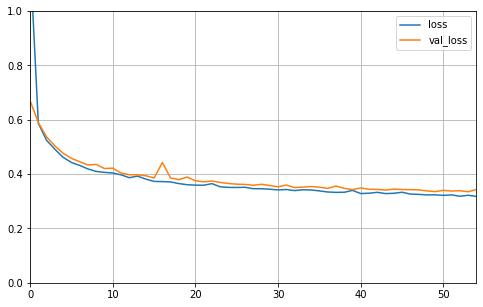

In [19]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)

    plt.show()
    
plot_learning_curves(history)